In [1]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Directorul în care se află setul de date
data_dir = "data"
class_names = ["5euro", "10euro", "20euro", "50euro"]

# Inițializăm liste pentru imagini și etichete
images = []
labels = []

# Parcurgem fiecare clasă
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith(".JPEG"):
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertim la formatul RGB
            img = cv2.resize(img, (224, 224))  # Redimensionăm la 224x224 pixeli
            images.append(img)
            labels.append(i)  # Etichetăm cu indexul clasei

# Convertim listele în numpy arrays
X = np.array(images)
y = np.array(labels)

# Împărțim setul de date în setul de antrenare și cel de testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificăm dimensiunile seturilor de date
print(f"Dimensiunea setului de antrenare: {X_train.shape[0]} imagini")
print(f"Dimensiunea setului de testare: {X_test.shape[0]} imagini")


Dimensiunea setului de antrenare: 1312 imagini
Dimensiunea setului de testare: 329 imagini


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Augmentarea datelor
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotire între -20 și +20 grade
    width_shift_range=0.2,  # Deplasare orizontală
    height_shift_range=0.2,  # Deplasare verticală
    shear_range=0.2,  # Deformare
    zoom_range=0.2,  # Zoom
    horizontal_flip=True,  # Flip orizontal
    vertical_flip=False,  # Nu flip vertical
    fill_mode="nearest"  # Mod de completare a pixelilor
)

# Fit datagen pe setul de antrenare
datagen.fit(X_train)

# Verificăm dimensiunile seturilor de date
print(f"Dimensiunea setului de antrenare: {X_train.shape[0]} imagini")
print(f"Dimensiunea setului de testare: {X_test.shape[0]} imagini")

Dimensiunea setului de antrenare: 1312 imagini
Dimensiunea setului de testare: 329 imagini


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definim modelul CNN
model = Sequential()

# Adăugăm straturi de convoluție și pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten și straturi complet conectate
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout pentru a evita overfitting
model.add(Dense(4, activation='softmax'))  # 4 clase (5, 10, 20, 50 euro)

# Compilăm modelul
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Afișăm arhitectura modelului
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [15]:
# Antrenăm modelul folosind datele augmentate
batch_size = 32
epochs = 15

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test)
)

# Evaluăm modelul pe setul de testare
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Acuratețea pe setul de testare: {test_accuracy:.2f}")


Epoch 1/15
41/41 [==============================] - 14s 149ms/step - loss: 59.1814 - accuracy: 0.2934 - val_loss: 1.2823 - val_accuracy: 0.3860
Epoch 2/15
41/41 [==============================] - 6s 138ms/step - loss: 1.3180 - accuracy: 0.3674 - val_loss: 1.3433 - val_accuracy: 0.3161
Epoch 3/15
41/41 [==============================] - 6s 141ms/step - loss: 1.3681 - accuracy: 0.2767 - val_loss: 1.3425 - val_accuracy: 0.2584
Epoch 4/15
41/41 [==============================] - 6s 140ms/step - loss: 1.3623 - accuracy: 0.3072 - val_loss: 1.3550 - val_accuracy: 0.2584
Epoch 5/15
41/41 [==============================] - 6s 142ms/step - loss: 1.3574 - accuracy: 0.2965 - val_loss: 1.3532 - val_accuracy: 0.2614
Epoch 6/15
41/41 [==============================] - 6s 143ms/step - loss: 1.3490 - accuracy: 0.3117 - val_loss: 1.3614 - val_accuracy: 0.2675
Epoch 7/15
41/41 [==============================] - 6s 142ms/step - loss: 1.3441 - accuracy: 0.3171 - val_loss: 1.3474 - val_accuracy: 0.2644
Epoc

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

# Definim modelul ResNet50 cu weights preantrenate pe ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adăugăm un strat Global Average Pooling
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Adăugăm un strat complet conectat cu 4 clase de ieșire
predictions = Dense(4, activation='softmax')(x)

# Creăm modelul final
model_resnet = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Congelăm straturile de bază (nu le antrenăm)
for layer in base_model.layers:
    layer.trainable = False

# Compilăm modelul
model_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Afișăm arhitectura modelului
model_resnet.summary()


94765736/94765736 [==============================] - 8s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [18]:
# Antrenăm modelul folosind datele augmentate
batch_size = 32
epochs = 15

history = model_resnet.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test)
)

# Evaluăm modelul pe setul de testare
test_loss, test_accuracy = model_resnet.evaluate(X_test, y_test)
print(f"Acuratețea pe setul de testare: {test_accuracy:.2f}")


Epoch 1/15
41/41 [==============================] - 7s 157ms/step - loss: 0.1610 - accuracy: 0.9688 - val_loss: 0.1602 - val_accuracy: 0.9574
Epoch 2/15
41/41 [==============================] - 7s 158ms/step - loss: 0.1677 - accuracy: 0.9604 - val_loss: 0.1725 - val_accuracy: 0.9483
Epoch 3/15
41/41 [==============================] - 7s 159ms/step - loss: 0.1663 - accuracy: 0.9573 - val_loss: 0.1722 - val_accuracy: 0.9544
Epoch 4/15
41/41 [==============================] - 7s 162ms/step - loss: 0.1327 - accuracy: 0.9710 - val_loss: 0.1544 - val_accuracy: 0.9574
Epoch 5/15
41/41 [==============================] - 7s 163ms/step - loss: 0.1359 - accuracy: 0.9672 - val_loss: 0.1396 - val_accuracy: 0.9696
Epoch 6/15
41/41 [==============================] - 7s 163ms/step - loss: 0.1248 - accuracy: 0.9741 - val_loss: 0.1282 - val_accuracy: 0.9696
Epoch 7/15
41/41 [==============================] - 7s 166ms/step - loss: 0.1173 - accuracy: 0.9710 - val_loss: 0.1273 - val_accuracy: 0.9696
Epoch 

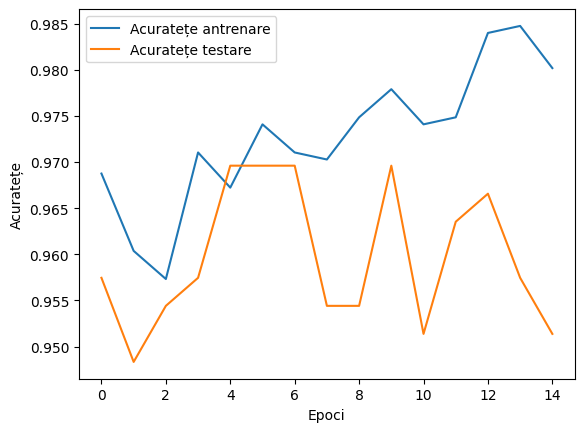

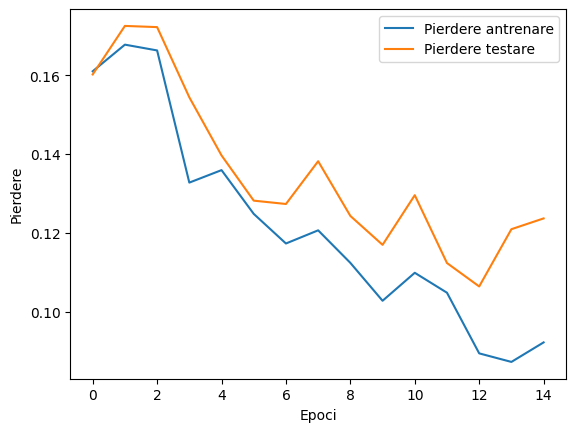

In [22]:
import matplotlib.pyplot as plt

# Afișăm graficul acurateței pe setul de antrenare și testare
plt.plot(history.history['accuracy'], label='Acuratețe antrenare')
plt.plot(history.history['val_accuracy'], label='Acuratețe testare')
plt.xlabel('Epoci')
plt.ylabel('Acuratețe')
plt.legend()
plt.show()

# Afișăm graficul pierderii pe setul de antrenare și testare
plt.plot(history.history['loss'], label='Pierdere antrenare')
plt.plot(history.history['val_loss'], label='Pierdere testare')
plt.xlabel('Epoci')
plt.ylabel('Pierdere')
plt.legend()
plt.show()


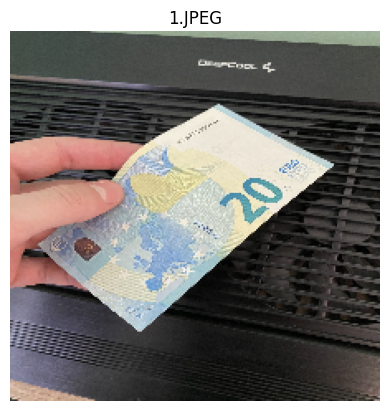

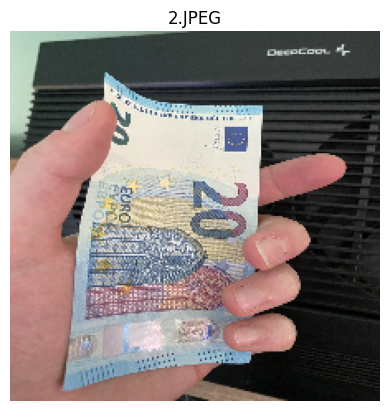

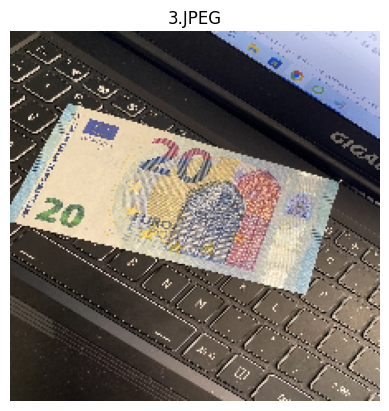

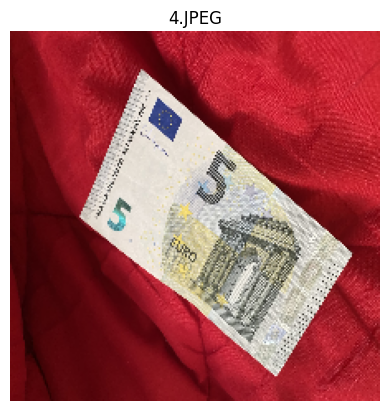

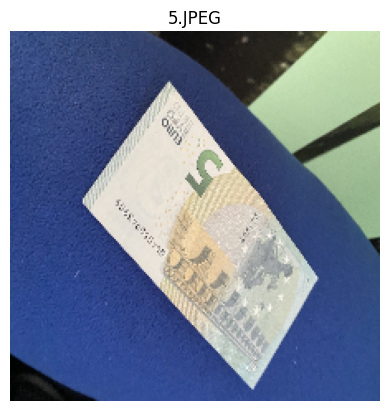

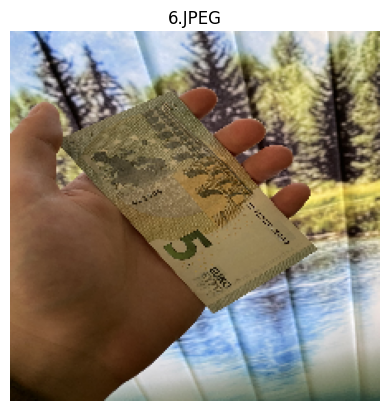

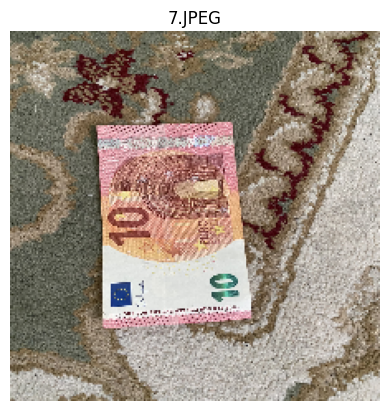

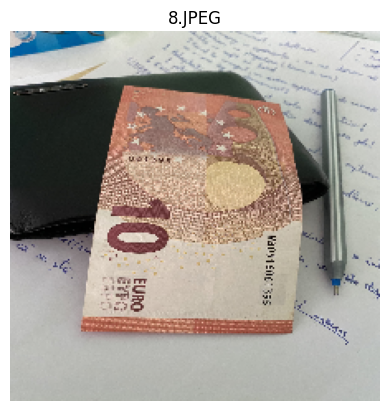

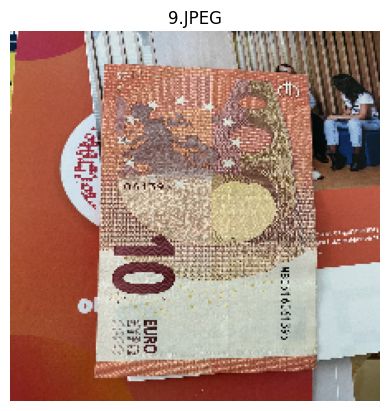

In [56]:
import cv2
import os
import matplotlib.pyplot as plt

# Directorul în care sunt stocate imaginile originale
director_imagini = "new"

# Lista în care vor fi salvate imaginile procesate
imagini = []

# Parcurge fiecare fișier din directorul specificat
for nume_fisier in os.listdir(director_imagini):
    # Construiește calea către imagine folosind directorul și numele fișierului
    cale_imagine = os.path.join(director_imagini, nume_fisier)
    
    # Verifică dacă fișierul este imagine (are extensia .jpg, .jpeg, etc.)
    if cale_imagine.endswith(('.jpg', '.JPEG', '.png', '.gif', '.jpeg')):
        # Încarcă imaginea folosind OpenCV
        img = cv2.imread(cale_imagine)
        
        # Verifică dacă imaginea a fost încărcată corect
        if img is not None:
            # Convertirea din formatul BGR în formatul RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Redimensionarea imaginii la 224x224
            img_redimensionata = cv2.resize(img_rgb, (224, 224))
            
            # Adaugă imaginea procesată în lista de imagini
            imagini.append(img_redimensionata)
            
            # Afișează imaginea procesată folosind Matplotlib
            plt.imshow(img_redimensionata)
            plt.title(nume_fisier)  # Setează titlul imaginii cu numele fișierului
            plt.axis('off')  # Dezactivează afișarea axelor
            plt.show()
        else:
            print(f"Imaginea {nume_fisier} nu a putut fi încărcată.")
    else:
        print(f"{nume_fisier} nu este o imagine.")


In [57]:
# Afișează numărul de imagini în lista imagini
print("Numărul de imagini în listă:", len(imagini))


Numărul de imagini în listă: 9


In [58]:
# Prezice clasa fiecărei imagini noi
new_predictions = model_resnet.predict(np.array(imagini))
predicted_classes = np.argmax(new_predictions, axis=1)

# Afișează rezultatele
for i, predicted_class in enumerate(predicted_classes):
    print(f"Imaginea {i + 1}: Clasa {class_names[predicted_class]}")

1/1 [==============================] - 0s 22ms/step
Imaginea 1: Clasa 20euro
Imaginea 2: Clasa 5euro
Imaginea 3: Clasa 50euro
Imaginea 4: Clasa 5euro
Imaginea 5: Clasa 50euro
Imaginea 6: Clasa 5euro
Imaginea 7: Clasa 50euro
Imaginea 8: Clasa 10euro
Imaginea 9: Clasa 10euro
